In [1]:
import pymc as pm
import netCDF4 as nc
import numpy as np
import aesara
import aesara.tensor as at
import arviz as az
import matplotlib.pyplot as plt


events = ["GW150914","GW170104","GW170823","GW190519_153544",
          "GW190521","GW190521_074359","GW190706_222641",
          "GW190828_063405","GW200224_222234","GW200311_115853"]

ds = {}
points = {}

for event in events:
    fn = f"./Results/{event}/{event}-charged-posteriors.nc"
    a = nc.Dataset(fn)
    ds[event] = a
    points[event] = np.array([np.array(x) for x in zip(a['posterior']['chi'][:].flatten(),a['posterior']['Q_charge'][:].flatten())])

events_that_look_alright = ['GW150914','GW190519_153544',
                            'GW190521','GW190521_074359',
                            'GW190706_222641','GW200224_222234']

n_events = len(events_that_look_alright)

points_good = {k:v for k,v in points.items() if k in events_that_look_alright}

def axplot_chiQ(ax,points, gridsize=20, labels=[r"$\chi$", r"$Q$"], **kwargs):
    ax.hexbin(points[:,0],points[:,1],gridsize=gridsize, extent=(0,1,0,1), **kwargs)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.plot(np.linspace(0,1,100), np.sqrt(1 - np.linspace(0,1,100)**2),c='b')
    ax.plot(np.linspace(0,1,100), 0.0*np.linspace(0,1,100),c='b')
    return ax

FileNotFoundError: [Errno 2] No such file or directory: b'./Results/GW190521_074359/GW190521_074359-charged-posteriors.nc'

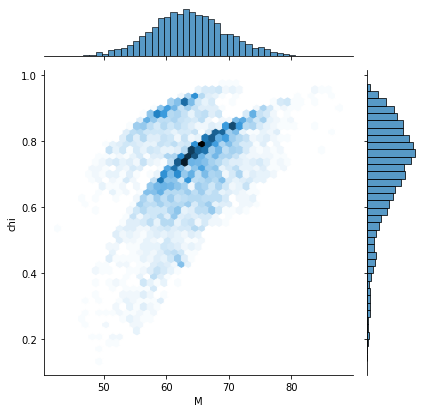

In [21]:
event = 'GW150914'
fn = f"./Results/{event}/{event}-charged-posteriors.nc"
a = nc.Dataset(fn)
Ms = np.array(a['posterior']['M'][:].flatten())
chis = np.array(a['posterior']['chi'][:].flatten())

import pandas as pd
import seaborn as sns

plotdf = pd.DataFrame({'M': Ms, 'chi': chis})

g = sns.jointplot(data=plotdf, x=r'M', y=r'chi', 
              kind='hex')

#g.fig.suptitle(f"{eventname} charged run")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)


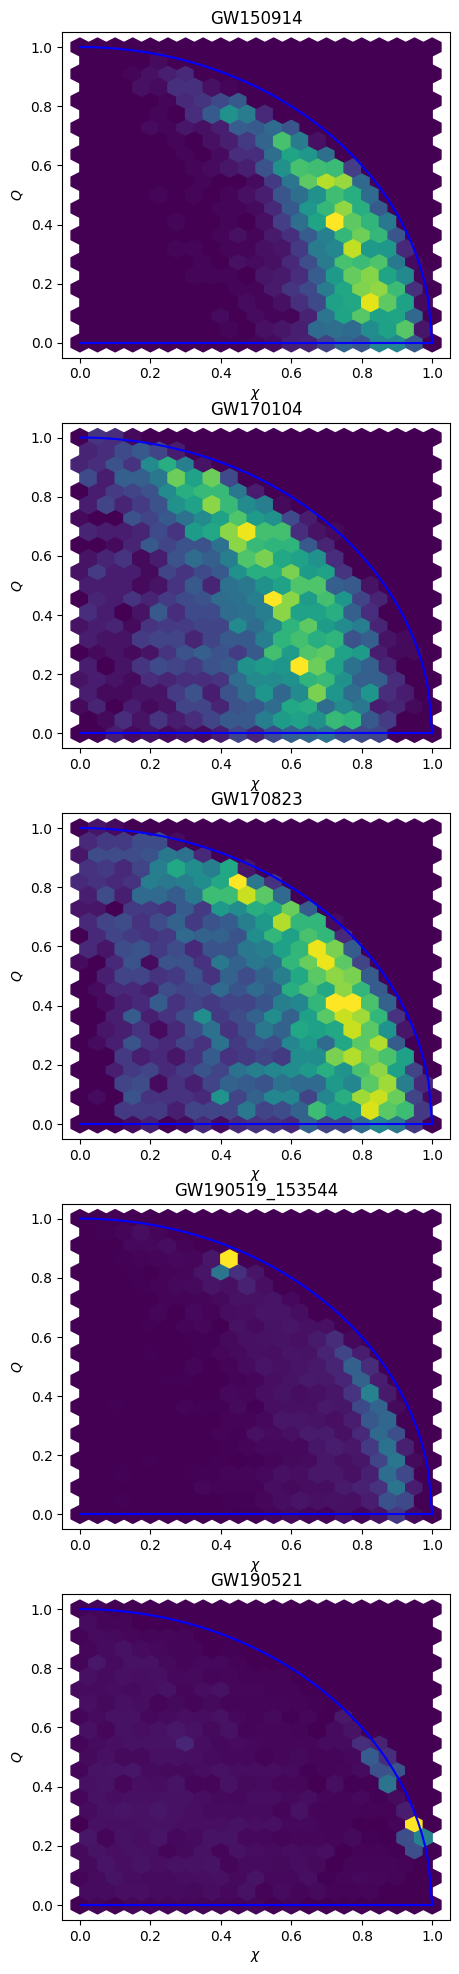

In [2]:
#fig, ax = plt.subplots(1, figsize=(5,5))
fig, axes = plt.subplots(nrows=len(points), ncols=1, figsize = ((5,len(points)*5)), dpi=100)

for i, eventname in enumerate(points.keys()):
    axes[i] = axplot_chiQ(axes[i], points[eventname])
    axes[i].set_title(eventname)

plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))

ax = axplot_chiQ(ax, points_good['GW150914'])

plt.show()

In [9]:
eventname = "GW150914"
result = az.from_netcdf(f"./Results/{event}/{event}-charged-posteriors.nc")

/Users/asadh/opt/anaconda3/envs/Hierarchical_Analysis/lib/python3.7/site-packages/arviz/plots/traceplot.py:216: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (26), generating only 20 plots
  UserWarning,


array([[<AxesSubplot:title={'center':'Apx_unit'}>,
        <AxesSubplot:title={'center':'Apx_unit'}>],
       [<AxesSubplot:title={'center':'Apy_unit'}>,
        <AxesSubplot:title={'center':'Apy_unit'}>],
       [<AxesSubplot:title={'center':'Acx_unit'}>,
        <AxesSubplot:title={'center':'Acx_unit'}>],
       [<AxesSubplot:title={'center':'Acy_unit'}>,
        <AxesSubplot:title={'center':'Acy_unit'}>],
       [<AxesSubplot:title={'center':'M'}>,
        <AxesSubplot:title={'center':'M'}>],
       [<AxesSubplot:title={'center':'r2_qchi'}>,
        <AxesSubplot:title={'center':'r2_qchi'}>],
       [<AxesSubplot:title={'center':'theta_qchi'}>,
        <AxesSubplot:title={'center':'theta_qchi'}>],
       [<AxesSubplot:title={'center':'q'}>,
        <AxesSubplot:title={'center':'q'}>],
       [<AxesSubplot:title={'center':'Q_charge'}>,
        <AxesSubplot:title={'center':'Q_charge'}>],
       [<AxesSubplot:title={'center':'chi'}>,
        <AxesSubplot:title={'center':'chi'}>],
      

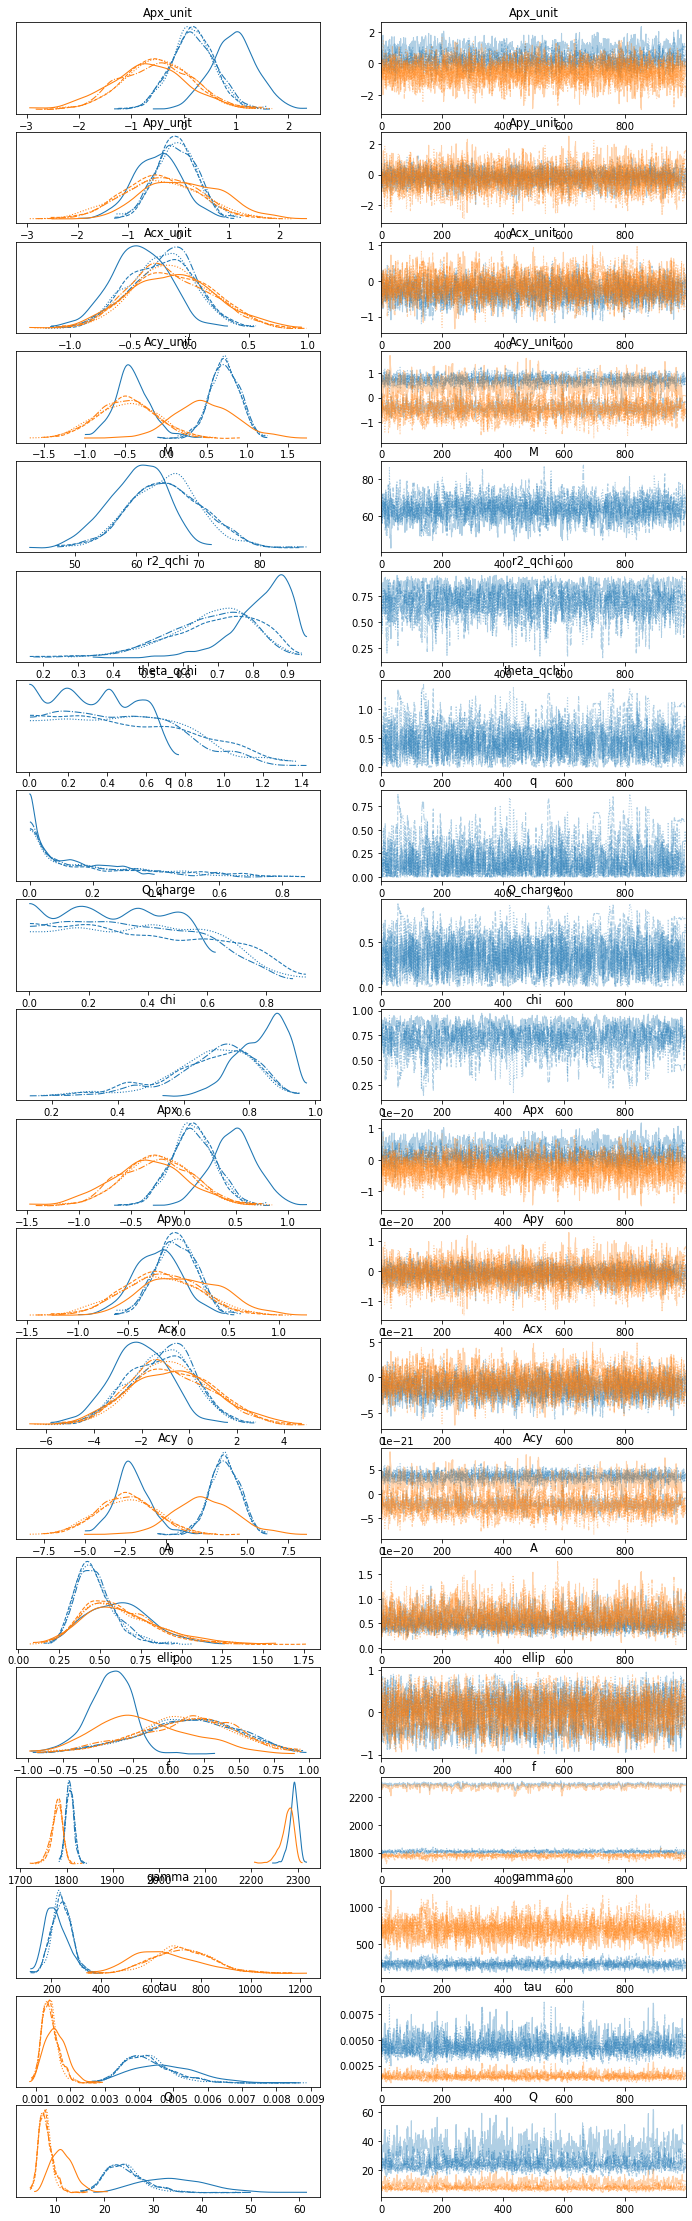

In [12]:
az.plot_trace(result)

In [14]:
events[0:2]

['GW150914', 'GW170104']

In [22]:
db

NameError: name 'db' is not defined